# CCT College

###### Module Title(s):	
Machine Learning for AI
###### Lecturer Name(s):	
David McQuaid
###### Assessment Title:	
ML_CA2
###### Student Name: 
Tamiris Rodrigues Duarte
###### Student Number:
2020294
###### Due Date (Deadline):	
31st May 2024

###### GitHub:	
https://github.com/tamirisrd/ML_CA2

### Neural Networks

You are required to take data stored file “BankRecords.csv”, available on Moodle and process the data into a DataFrame. 
You are then required to train a Neural Network to predict the “Income(Thousands’)” of the customers, including tuning the network to achieve the best results.
You must also compare your neural network to a standard ML regressor of your choosing and discuss your findings in the context of the problem at hand.

### Semantic Analysis

You are required to source text data from any social media platform on any topic that you choose and perform semantic analysis on the text. This analysis should provide a visualization of  the overall sentiment of your text data , showing the positive, neutral, and negative sentiment expressed. You will require at least 1000 text observations.

> checking missing values 

> add a column to relate the sentiment to a number as ML only reads numbers

> nothing else perfomerd as data has only two columns, no missing values and its pretty straightfoward

> sentiment textblob different from sentiment column already existent

> now there's neutral. It's very low, but exists. 

###### Requirements

Perform any preparation of the data (for both the Neural Network and Semantic Analysis data) , that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.[0-30]

Create and implement at least 1 Regression algorithm and 1 Neural Network that will output a Prediction of the  “Income(Thousands’)” of the customers. Test these models and try to improve it as you see fit discussing your rationale. Discuss your findings and final rational for choosing a particular Regression algorithm.[0-40]

Make a Prediction of a new customers income, who is not available in the original dataset [0-5]

Perform Sentiment analysis on your text data and discuss your findings in detail. [0-20]

Visualize your sentiment analysis showing the positive, neutral, and negative sentiment expressed[0-5]


In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Semantic Analysis

In [38]:
# Read file
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [40]:
# Checking missing values
missing_value = df.isnull().sum()
print(missing_value)

review       0
sentiment    0
dtype: int64


In [44]:
# Add column enumerating sentiment
df["value"] = df["sentiment"].apply(lambda x: 0 if x == "positive" else(1 if x == "negative" else None))

df.head()

,review,sentiment,value
0,One of the other reviewers has mentioned that ...,positive,0
1,A wonderful little production. <br /><br />The...,positive,0
2,I thought this was a wonderful way to spend ti...,positive,0
3,Basically there's a family where a little boy ...,negative,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0


<Axes: xlabel='value', ylabel='count'>

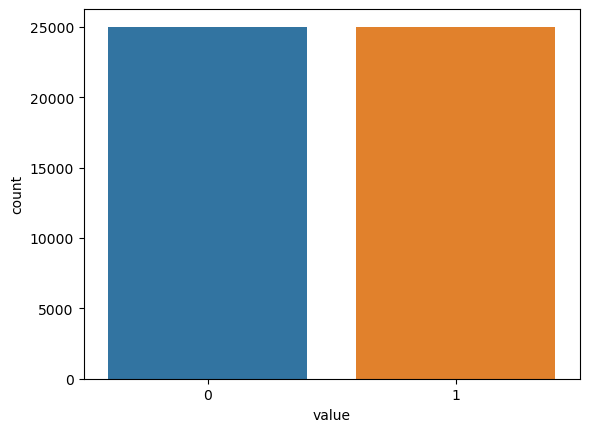

In [49]:
sns.countplot(x="value", data=df)

<Axes: xlabel='sentiment', ylabel='count'>

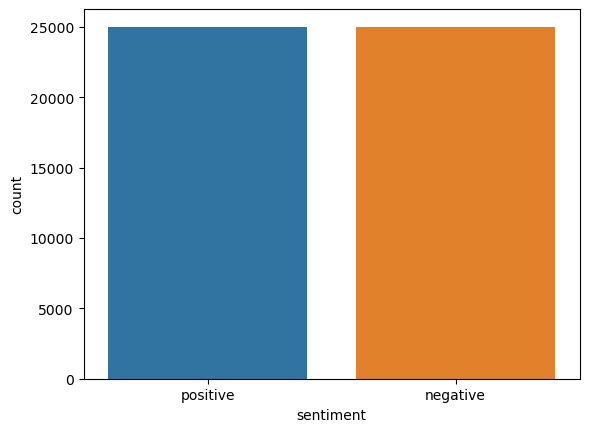

In [50]:
sns.countplot(x="sentiment", data=df)

In [51]:
from textblob import TextBlob

In [52]:
df["sentiment_score"]= df["review"].apply(lambda x:TextBlob(x).sentiment[0])

In [70]:
df["sentiment_score_textblob"] = df["sentiment_score"].apply(lambda x: "positive" if x > 0 else("neutral" if x == 0 else "negative"))

In [76]:
df

,review,sentiment,value,sentiment_score,sentiment_score_textblob
0,One of the other reviewers has mentioned that ...,positive,0,0.023433,positive
1,A wonderful little production. <br /><br />The...,positive,0,0.109722,positive
2,I thought this was a wonderful way to spend ti...,positive,0,0.354008,positive
3,Basically there's a family where a little boy ...,negative,1,-0.057813,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0,0.217952,positive
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,0,0.394425,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,1,-0.276190,negative
49997,I am a Catholic taught in parochial elementary...,negative,1,0.056984,positive
49998,I'm going to have to disagree with the previou...,negative,1,-0.048663,negative


<Axes: xlabel='sentiment_score_textblob', ylabel='count'>

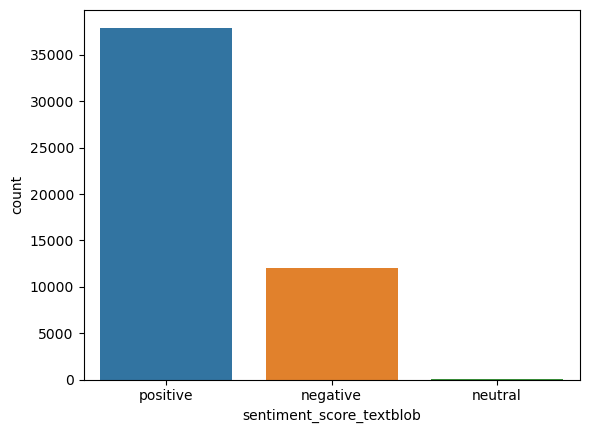

In [78]:
sns.countplot(x="sentiment_score_textblob", data=df)

# References
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Tutorial used in class 13/05